In [ ]:
!pip install mlxtend

In [1]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

# Gun control Survey

The dataset contain answers of survey questions on gun control of the people of different age ranges and regions.

In [5]:
train = pd.read_csv("gun_control.csv")
train.head(10)

,gender,age,region,political_affiliation,should_background_checks_on_gun_buyers_be_more_extensive,should_there_be_more_restrictions_on_who_can_buy_a_gun,will_further_gun_control_reduce_the_possibilities_of_mass_shootings,should_civilians_be_allowed_to_own_guns
0,Female,17 or younger,"East North Central (Illinois, Indiana, Michiga...",Libertarian Party,No,No,Yes,Yes
1,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Green Party,Yes,Yes,Yes,Yes
2,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
3,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Green Party,Yes,Yes,Yes,No
4,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Republican Party,Yes,Yes,Yes,No
5,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
6,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
7,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
8,Female,18 to 24 years,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
9,Female,18 to 24 years,"Mid-Atlantic (New Jersey, New York, and Pennsy...",Democratic Party,Yes,Yes,Yes,No


 Data columns (total 8 columns):
    * gender                                                                 560 non-null object
    * age                                                                    560 non-null object
    * region                                                                 560 non-null object
    * political_affiliation                                                  560 non-null object
    * should_background_checks_on_gun_buyers_be_more_extensive               560 non-null object
    * should_there_be_more_restrictions_on_who_can_buy_a_gun                 560 non-null object
    * will_further_gun_control_reduce_the_possibilities_of_mass_shootings    560 non-null object
    * should_civilians_be_allowed_to_own_guns  

In [67]:

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 8 columns):
gender                                                                 560 non-null object
age                                                                    560 non-null object
region                                                                 560 non-null object
political_affiliation                                                  560 non-null object
should_background_checks_on_gun_buyers_be_more_extensive               560 non-null object
should_there_be_more_restrictions_on_who_can_buy_a_gun                 560 non-null object
will_further_gun_control_reduce_the_possibilities_of_mass_shootings    560 non-null object
should_civilians_be_allowed_to_own_guns                                560 non-null object
dtypes: object(8)
memory usage: 35.1+ KB
None


# Gender

Out of total 560 entries 272 are females and 288 are males.

Female: 272 (48.6 percent), Male: 288 (51.4 percent), Total: 560
    * Male     : 288
    * Female   : 272

Female: 272 (48.6 percent), Male: 288 (51.4 percent), Total: 560


Male      288
Female    272
Name: gender, dtype: int64

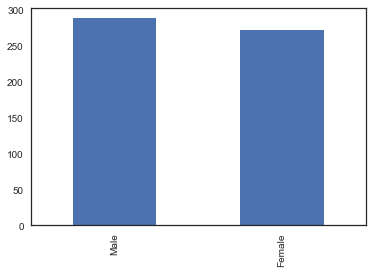

In [13]:
female = train[train['gender']=='Female']
male = train[train['gender']=='Male']

female_col = "blue"
male_col = "red"

print("Female: %i (%.1f percent), Male: %i (%.1f percent), Total: %i"\
      %(len(female), 1.*len(female)/len(train)*100.0,\
        len(male), 1.*len(male)/len(train)*100.0, len(train)))



a = train['gender'].value_counts()
a.plot(kind='bar')
a

# Age

The survey was conducted upon 7 age groups, their counts is given below :

    * 25 to 34 years       179
    * 35 to 44 years       138
    * 18 to 24 years        85
    * 45 to 54 years        78
    * 55 to 64 years        45
    * 65 years and over     19
    * 17 or younger         16


25 to 34 years       179
35 to 44 years       138
18 to 24 years        85
45 to 54 years        78
55 to 64 years        45
65 years and over     19
17 or younger         16
Name: age, dtype: int64

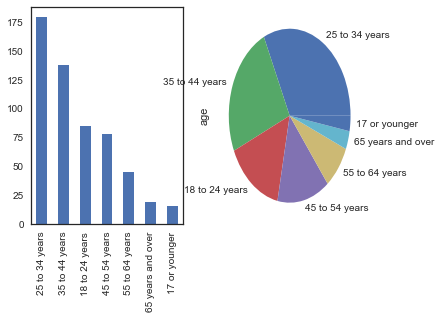

In [93]:
a = train['age'].value_counts()

plt.subplot(121)
a.plot(kind='bar')

plt.subplot(122)
a.plot(kind='pie')
a

# Political Affiliation

Political supporter counts :

    * Democratic Party      288
    * Republican Party      182
    * Libertarian Party      51
    * Green Party            25
    * Constitution Party     14

Democratic Party      288
Republican Party      182
Libertarian Party      51
Green Party            25
Constitution Party     14
Name: political_affiliation, dtype: int64

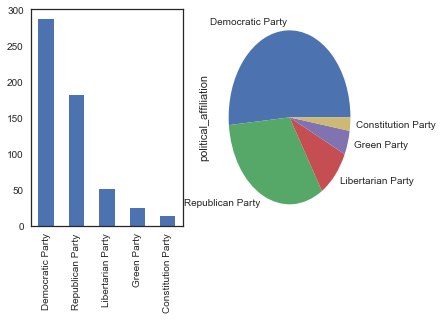

In [17]:
a = train['political_affiliation'].value_counts()

plt.subplot(121)
a.plot(kind='bar')

plt.subplot(122)
a.plot(kind='pie')
a

# Political Affiliation with gender

The number of females based on political affiliation :
    * Democratic Party      152
    * Republican Party      75
    * Libertarian Party     24
    * Green Party           13
    * Constitution Party    8
    
The number of males based on political affiliation :

    * Democratic Party     136
    * Republican Party     107
    * Libertarian Party    27
    * Green Party          12
    * Constitution Party   6

Democratic Party      152
Republican Party       75
Libertarian Party      24
Green Party            13
Constitution Party      8
Name: political_affiliation, dtype: int64
Democratic Party      136
Republican Party      107
Libertarian Party      27
Green Party            12
Constitution Party      6
Name: political_affiliation, dtype: int64


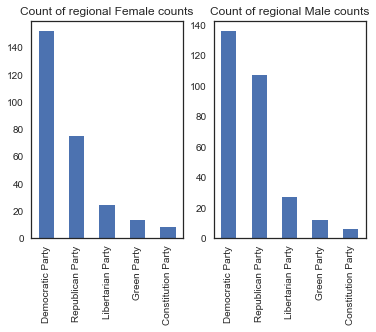

In [31]:
plt.subplot(121)
regionFemale = train['political_affiliation'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')

print(regionFemale)

plt.subplot(122)
regionMale = train['political_affiliation'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')
print(regionMale)

# Survey Quesions

In [43]:

a = len(train[train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'])/len(train)*100
b = len(train[train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'])/len(train)*100
c = len(train[train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'])/len(train)*100
a
b

86.07142857142858

In [ ]:
list(train.columns.values)

# 


In [ ]:
plt.subplot(121)
regionFemale = train['age'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')
plt.subplot(122)
regionMale = train['age'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')

# Political Affiliation


## What percentage of people from different political Affiliation think that background checks on gun buyers should be more extensive?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers should be more extensive are:

    * Democratic Party      92
    * Republican Party      85
    * Libertarian Party     76
    * Green Party           84
    * Constitution Party    85

Democratic Party      92
Republican Party      85
Libertarian Party     76
Green Party           84
Constitution Party    85
Name: political_affiliation, dtype: int64

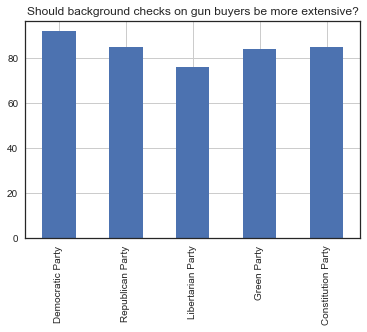

In [63]:

columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'].value_counts()


for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar',grid = True)
plt.title('Should background checks on gun buyers be more extensive?')

a

# Political Affiliation


## What percentage of people from different political Affiliation think that there should be more restrictions on who can buy a gun?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers who think there should be more restrictions on who can buy a gun:

    * Democratic Party      92
    * Republican Party      79
    * Libertarian Party     74
    * Green Party           96
    * Constitution Party    64

Democratic Party      92
Republican Party      79
Libertarian Party     74
Green Party           96
Constitution Party    64
Name: political_affiliation, dtype: int64

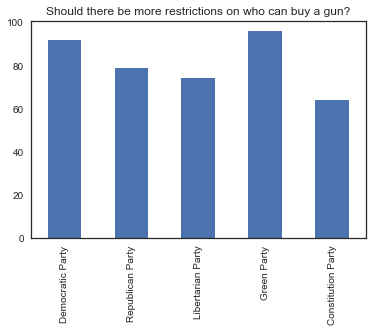

In [62]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Should there be more restrictions on who can buy a gun?')
a

Democratic Party      72
Republican Party      49
Libertarian Party     45
Green Party           64
Constitution Party    57
Name: political_affiliation, dtype: int64

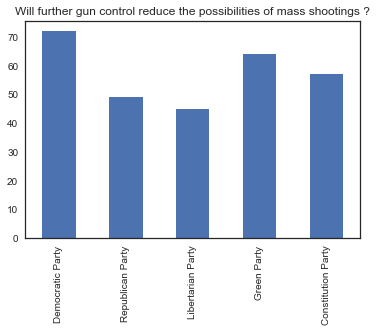

In [65]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Will further gun control reduce the possibilities of mass shootings ?')
a

Democratic Party      73
Republican Party      84
Libertarian Party     82
Green Party           80
Constitution Party    92
Name: political_affiliation, dtype: int64

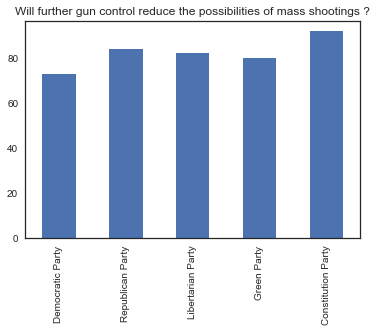

In [69]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Will further gun control reduce the possibilities of mass shootings ?')
a

Male      81
Female    75
Name: gender, dtype: int64
Female    90
Male      81
Name: gender, dtype: int64
Female    64
Male      59
Name: gender, dtype: int64
Male      81
Female    75
Name: gender, dtype: int64


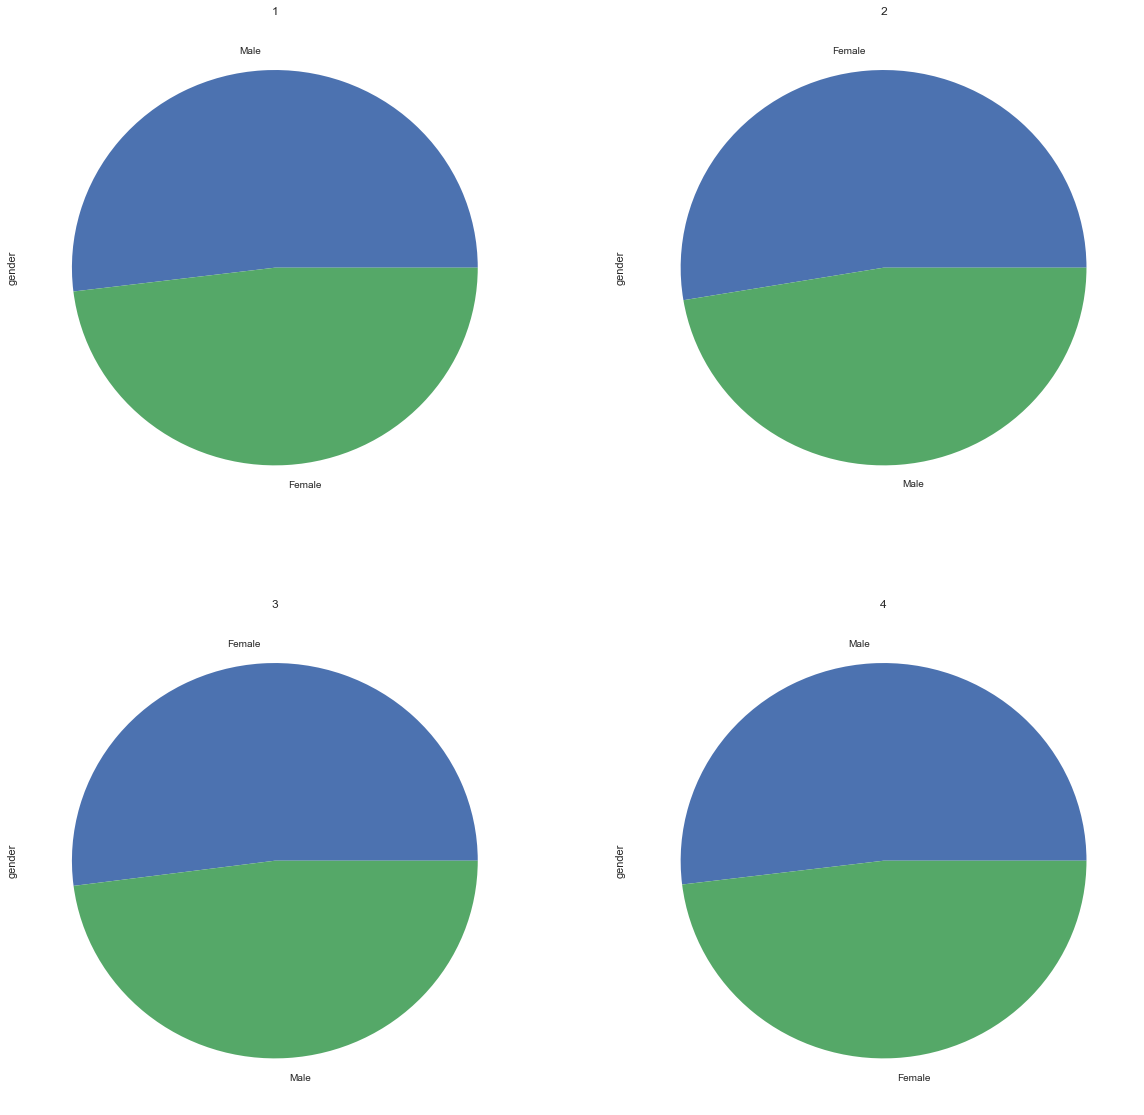

In [86]:


columns = ['Female','Male']

a = train['gender'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(221)
a.plot(kind='pie',figsize=(20, 20))
plt.title('1')
print(a)


columns = ['Female','Male']

a = train['gender'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(222)
a.plot(kind='pie')
plt.title('2')
print(a)


columns = ['Female','Male']

a = train['gender'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(223)
a.plot(kind='pie')
plt.title('3')
print(a)



columns = ['Female','Male']

a = train['gender'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

    
plt.subplot(224)
a.plot(kind='pie')
plt.title('4')
print(a)

25 to 34 years       74
35 to 44 years       82
45 to 54 years       87
18 to 24 years       68
55 to 64 years       86
65 years and over    78
17 or younger        68
Name: age, dtype: int64
25 to 34 years       86
35 to 44 years       84
18 to 24 years       89
45 to 54 years       88
55 to 64 years       82
65 years and over    94
17 or younger        75
Name: age, dtype: int64
25 to 34 years       68
35 to 44 years       57
18 to 24 years       71
45 to 54 years       52
55 to 64 years       44
17 or younger        75
65 years and over    52
Name: age, dtype: int64
25 to 34 years       74
35 to 44 years       82
45 to 54 years       87
18 to 24 years       68
55 to 64 years       86
65 years and over    78
17 or younger        68
Name: age, dtype: int64


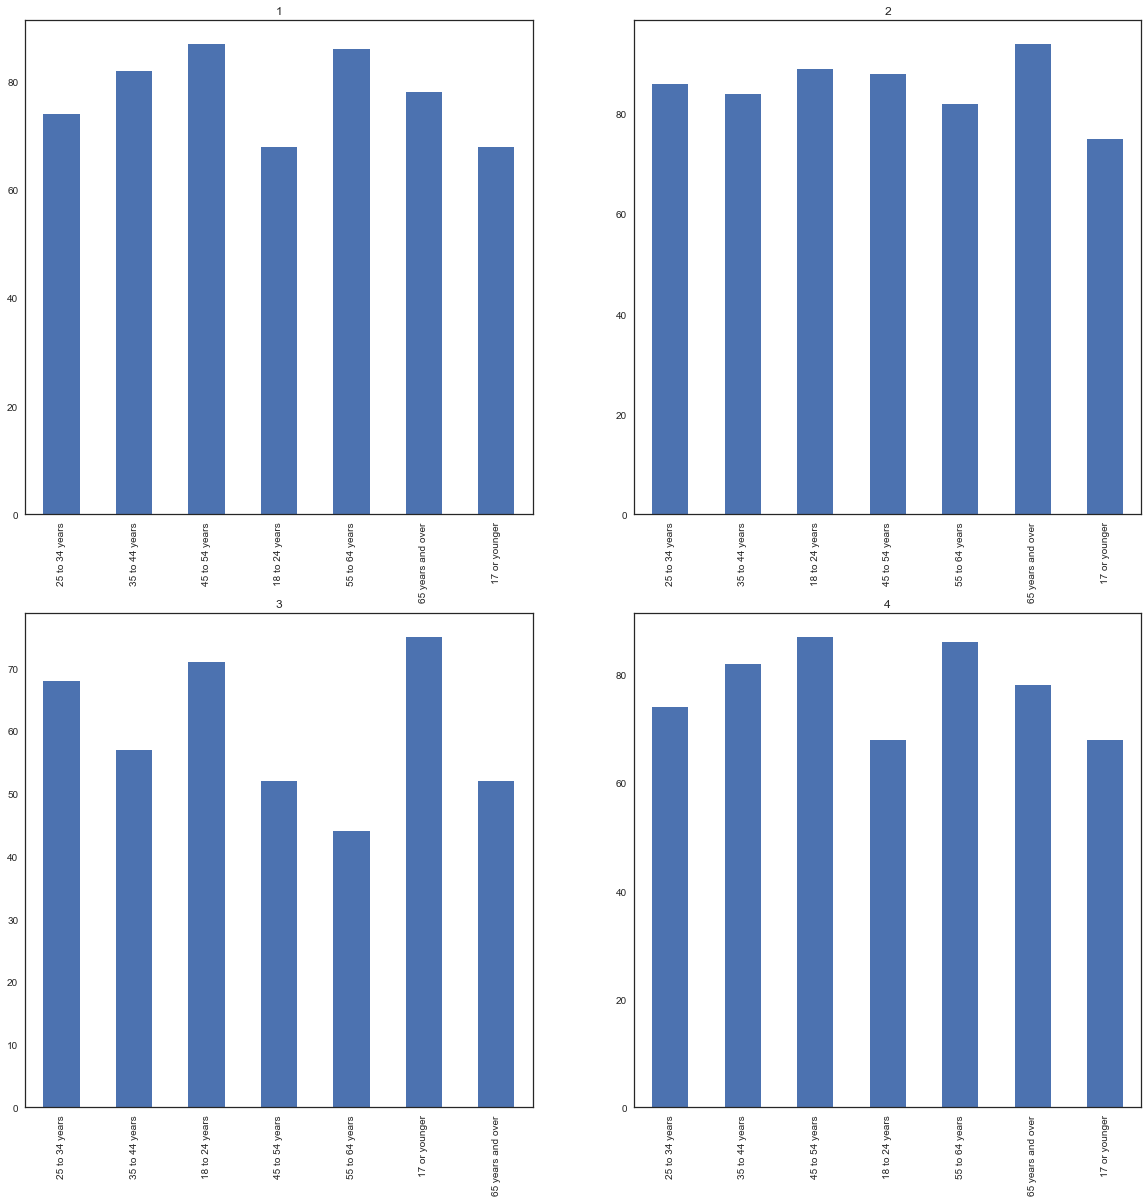

In [91]:
columns = ['25 to 34 years','35 to 44 years','18 to 24 years','45 to 54 years','55 to 64 years','65 years and over','17 or younger']

a = train['age'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(221)
a.plot(kind='bar',figsize=(20,20))
plt.title('1')
print(a)


a = train['age'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(222)
a.plot(kind='bar')
plt.title('2')
print(a)


a = train['age'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(223)
a.plot(kind='bar')
plt.title('3')
print(a)



a = train['age'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

    
plt.subplot(224)
a.plot(kind='bar')
plt.title('4')
print(a)

Female    64
Male      59
Name: gender, dtype: int64

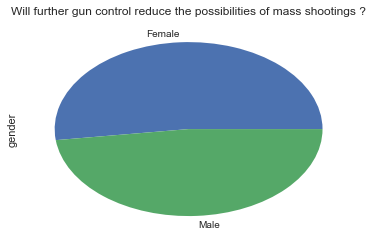

Male      81
Female    75
Name: gender, dtype: int64

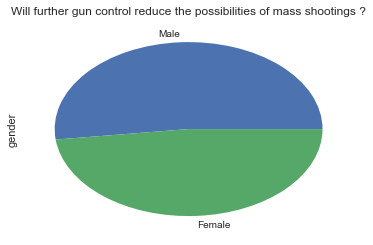